Задание **Ultra Lite**


Самостоятельно обучите нейросеть по классификации текстов писателей. 

Для этого нужно предварительно написать обработку данных, разделение датасета «скользящим окном», саму нейросеть. Можно подглядывать в ноутбук занятия, однако код следует писать самому - без копирования.

In [27]:
# Для начала работы подключим все необходимые библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, SpatialDropout1D, BatchNormalization, Flatten, Embedding, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from google.colab import drive
import numpy as np
import os
import time
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline


# В первую очередь подготовим данные

In [28]:
# Создадим функцию для первоначальной обработки файла
def readText(fileName):
  op = open(fileName, 'r')        # Указываем что открытие будет в режиме чтения
  text = op.read()                # Читаем файл с текстом
  text = text.replace("\n", " ")  # Заменям переносы строк на пробелы
  return text                     # Возвращаем измененный файл

In [29]:
# Объявим классы. Запишем в список
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]

# Подсчитаем кол-во нужных нам классов
nClasses = len(className)

# Выведем на экран для проверки
print (nClasses)

6


# Загрузим обучающие тексты

In [30]:
# Создадим 2 пустых списка (обучающий и проверочный), llz последующего заполнения

trainText = []
testText = []


In [31]:
# Пройдемся двумя циклами для заполнения списков. Так чтобы каждый i элемент в обучающей выборке соответствовал j элементу в тестовой.

for i in className:                                  # Проходим по каждому классу из списка ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"
  for j in os.listdir('/content/'):                     # Вторым циклом проходим по каждому файлу из папки texts
    if i in j:                                       # Если класс из списка содержится в папке texts, тогда
      if 'Обучающая' in j:                           # Если в имени файла содержится данное слово "Обучающая", то 
        trainText.append(readText('/content/' +j))      # Добавить в обучающую выборку
        print (j, 'добавлен в обучающую выборку')    # Проверим добавился или нет
      if 'Тестовая' in j:                            # Если в имени файла содержится данное слово "Тестовая", то 
        testText.append(readText('/content/' +j))       # Добавить в тестовую выборку
        print (j, 'добавлен в тестовую выборку')     # Проверим добавился или нет
  print ()                                           # Для разделения до   

(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку
(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку

(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку



In [32]:
# Посмотрим на результат работы
# Тип переменной 
print ("Тип trainText: ",type(trainText))
# Длина списка
print ("Длина списка trainText: ",len(trainText))
# Так же например узнать кол-во символов в одном из обучающих текстов
print ("Количество символов в (О. Генри) Тестовая_20 вместе.txt: ",len(trainText[1]))


Тип trainText:  <class 'list'>
Длина списка trainText:  6
Количество символов в (О. Генри) Тестовая_20 вместе.txt:  2042469


# Обработка данных. Преобразование в числовые векторы

In [33]:
# Для понимания как быстро современные компьютеры могут обрабатывать информацию, воспользуемся функцией time.
cur_time = time.time()   # Засекаем время начала (текущее)
maxWordsCount = 20000    # Зададим максимальное кол-во слов/индексов при обучении

# C помощью функции Tokenizer разобъем текст и превратим в матрицу числовых значений
tokenizer = Tokenizer(num_words = maxWordsCount, filters = '!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token ='unknow', char_level = False)

tokenizer.fit_on_texts(trainText)     # Обрабатываем методом fit_on_texts подготовленный обучающий список trainText

# Для просмотра нужно вытащить индексы слов c помощью метода word_index.items и сделать из него список
items = list(tokenizer.word_index.items())

# Посотрим сколько потребуется времени для выполнения данного кода
print ("Время обработки:", round(time.time() - cur_time, 2), 'c')

Время обработки: 2.27 c


In [34]:
# Посмотрим на результат.
# 10 самых часто встречающихся слов:
print (items[:10])

[('unknow', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10)]


In [35]:
# И 10 самых редких слов 
print (items[-10:])

[('поджарьте', 133061), ('заполните', 133062), ('мучающие', 133063), ('погремушкой', 133064), ('свистком', 133065), ('потерян', 133066), ('расплывающиеся', 133067), ('миллионе', 133068), ('зияющая', 133069), ('ничтонавстречу', 133070)]


In [36]:
# Размер словаря.
len(items)

133070

In [37]:
# Чтобы узнать индекс интересующего слова в словаре, можно воспользоваться методом word_index

#print ("Имеет индекс: ", tokenizer.word_index[input("Слово: ")])

In [38]:
# Теперь согласно частотному словарю можно преобразовать текст в последовательность индексов

trainWordIndexes = tokenizer.texts_to_sequences(trainText)   # Обучающие в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)     # Проверочные в индексы



In [39]:
# Посмотрим информацию об этих переменных. Тип и размер.
print (type(trainWordIndexes))   
print (type(testWordIndexes))   
print (len(trainWordIndexes))
print (len(testWordIndexes)) 
# trainWordIndexes и testWordIndexes являются списками (list)

<class 'list'>
<class 'list'>
6
6


In [40]:
# Можно посмотреть как именно преобразовывается текст
print ("В оригинале:                   ", trainText[1][999:1078])
print ("В последовательности индексов: ", testWordIndexes[2][1000:1010])

В оригинале:                    задержавшись, спросил, где командир. Это животное даже не обернулось — буркнул 
В последовательности индексов:  [221, 113, 385, 63, 1, 212, 5, 17797, 17797, 3605]


# Собирем общую статистику

In [41]:
# Перед подачей в нейронную сеть стоит убедиться что собранная база корректна. Для этого:

symbolsTrainText = 0 # Создадим счетчик для подстчета символов в обучающих текстах
wordsTrainText = 0   # Так же счетчик слов

# Пройдемся циклом по всем классам
print ("Общая статистика по обучающим текстам:\n")

for i in range(nClasses):
    print (className[i], ' '*(10-len(className[i])), len(trainText[i]), "символов и", len(trainWordIndexes[i]), "слов")
    symbolsTrainText += len(trainText[i])       # Общее кол-во символов
    wordsTrainText += len(trainWordIndexes[i])  # Общее кол-во слов

print("\nВ сумме ", symbolsTrainText, "символов и ", wordsTrainText, "слов\n--------------------------------------------")


# Аналогично посмотрим по тестовым

print ("\nОбщая статистика по тестовым текстам:\n")

symbolsTestText = 0 
wordsTestText = 0

for i in range(nClasses):
    print (className[i], ' '*(10-len(className[i])), len(testText[i]), "символов и", len(testWordIndexes[i]), "слов")
    symbolsTestText += len(testText[i])       
    wordsTestText += len(testWordIndexes[i]) 
print("\nВ сумме ", symbolsTestText, "символов и ", wordsTestText, "слов")

# Видно что с такой базой можно работать. Нет перекоса. Можно приступать к созданию выборок (обучающей и проверочной)



Общая статистика по обучающим текстам:

О. Генри    1049517 символов и 160607 слов
Стругацкие  2042469 символов и 313012 слов
Булгаков    1765648 символов и 261465 слов
Саймак      1609507 символов и 251502 слов
Фрай        3700010 символов и 568533 слов
Брэдберри   1386454 символов и 214454 слов

В сумме  11553605 символов и  1769573 слов
--------------------------------------------

Общая статистика по тестовым текстам:

О. Генри    349662 символов и 53238 слов
Стругацкие  704846 символов и 108621 слов
Булгаков    875042 символов и 132730 слов
Саймак      318811 символов и 50360 слов
Фрай        1278191 символов и 196731 слов
Брэдберри   868673 символов и 132524 слов

В сумме  4395225 символов и  674204 слов


# Создание обучающей и проверочной выборок

In [42]:
# Для начала создадим функции. 
# Первая для разделения на короткие векторы с заданным шагом и размером

def getSetFromIndexes (wordIndexes, xLen, step):     # В качестве аргументов принимает (trainWordIndexes или testWordIndexes - список, размер и шаг) 
  xSample = []                                        # Созадим пустой спискок для хранения векторов
  wordsLen = len(wordIndexes)                         # Кол-во слов в поданных на вход trainWordIndexes или testWordIndexes
  index = 0                                           # Начальный индекс (с помощью этой переменной будем сдвигать шаг)


  while (index + xLen <= wordsLen):                   # Задаем цикл пока не дойдем до конца    
    xSample.append(wordIndexes[index:index + xLen])   # На каждой итерации добавляем в список кусок вектора заданной длины
    index += step                                     # Смещаемся на шаг

  return xSample

In [43]:
# Вторая функция для формирования обучающей и проверочной выборок

def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)                            # Зададим кол-во классов выборки
  classesXSample = []                                    # Создадим пустой список в котором будут храниться список нарезанных кусочков предыдущей функцией getSetFromIndexes

  # Пройдемся циклом по каждому тексту выборки из последовательнстей индексов
  for i in wordIndexes:
    classesXSample.append(getSetFromIndexes(i, xLen, step))
  
  # Сформируем один общий список
  xSamples = []                                           # Создаем пустые списки
  ySamples = []

  for t in range(nClasses):                               # В нашем случаи цикл от 0 до 6 (кол-во классов)
    xT = classesXSample[t]                                # На каждой итерации цикла берем очередной нарезанный текст одного из класса

    for i in range (len(xT)):                             # Циклом проходимся по каждому его окну
      xSamples.append(xT[i])                              # Добавляем в общий список обучающей выборке
      ySamples.append(utils.to_categorical(t, nClasses))  # И соответствующий вектор класса
  
  # Переводим в numpy массив
  xSamples = np.array(xSamples)                           
  ySamples = np.array(ySamples)    

  # B возвращаем выборки
  return (xSamples, ySamples)

# Подготовка данных

In [63]:
# Установим базовые параметры
xLen = 1000        # Длина отрезка текста на которые будет разбивать функция getSetFromIndexes
step = 100         # Шаг разбивания для той же функции

In [45]:
# Можем посмотреть сколько займет времени подготовка данных
cur_time = time.time()

# Сформируем выборки (обучающую и тестовую)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

# Посмотрим что в итоге получилось
print (xTrain.shape)
print (yTrain.shape)
print (xTest.shape)
print (yTest.shape)

print ("Время обработки:", round(time.time() - cur_time, 2), 'c')

(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.07 c


Для Embedding обучающие и тестовые наборы готовы, но для BOW нужно xTrain и yTrain представить в виде векторов из 0 и 1

In [46]:
#cur_time = time.time()

# Преобразовываем в матрицы нулей и единиц по принципу BOW. xTrain и yTrain подаем в виду списка. 
xTrainBOW = tokenizer.sequences_to_matrix(xTrain.tolist())      
xTestBOW = tokenizer.sequences_to_matrix(xTest.tolist())      

# Посмотрим на размер обучающей выборки, сформированной по BOW
print (xTrainBOW.shape)
print (xTestBOW.shape)

#print ("Время обработки:", round(time.time() - cur_time, 2), 'c')

(17640, 20000)
(6686, 20000)


Пробовал задавать такие параметры:

maxWordsCount = 25000

xLen = 500

step = 50


Идет переполнение памяти и перезагрузка ноутбука. Поставил: 

maxWordsCount = 20000

xLen = 1000

step = 100

# Создаем нейросеть для BOW

In [47]:
# Создадим полносвязную сеть
modelBow = Sequential()
modelBow.add(Dense(300, input_dim=maxWordsCount, activation = 'relu'))     # input_dim = maxWordsCount = 20000  - входные данные
modelBow.add(Dropout(0.45))
modelBow.add(BatchNormalization())
modelBow.add(Dense(6, activation ='softmax'))

In [48]:
# Скомпилируем ее
modelBow.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
177/177 [==============================] - 2s 11ms/step - loss: 0.2108 - accuracy: 0.9338 - val_loss: 0.3544 - val_accuracy: 0.8966
Epoch 2/15
177/177 [==============================] - 2s 9ms/step - loss: 5.7783e-04 - accuracy: 1.0000 - val_loss: 0.3144 - val_accuracy: 0.9010
Epoch 3/15
177/177 [==============================] - 2s 9ms/step - loss: 2.5301e-04 - accuracy: 1.0000 - val_loss: 0.3072 - val_accuracy: 0.9031
Epoch 4/15
177/177 [==============================] - 2s 9ms/step - loss: 1.6370e-04 - accuracy: 1.0000 - val_loss: 0.3101 - val_accuracy: 0.9004
Epoch 5/15
177/177 [==============================] - 2s 9ms/step - loss: 1.0587e-04 - accuracy: 1.0000 - val_loss: 0.3057 - val_accuracy: 0.9017
Epoch 6/15
177/177 [==============================] - 2s 9ms/step - loss: 6.9590e-05 - accuracy: 1.0000 - val_loss: 0.3038 - val_accuracy: 0.9026
Epoch 7/15
177/177 [==============================] - 2s 9ms/step - loss: 5.8746e-05 - accuracy: 1.0000 - val_loss: 0.3014 - va

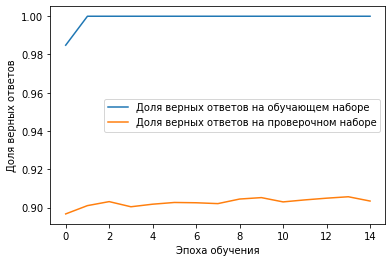

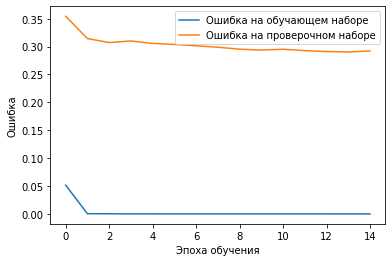

In [49]:
# Обучаем сеть на выборке, xTrainBOW

history = modelBow.fit(xTrainBOW, yTrain, epochs=15, batch_size = 100, validation_data=(xTestBOW, yTest))


# Посмотрим на график обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


# График ошибок. На предмет переобучения сети.
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# При таких значениях гиперпараметрах сети на проверочной выборке удалось добиться точности больше 90% 

In [50]:
# Сохраним веса
modelBow.save_weights('modelBow - loss: 1.5512e-05 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9034.h5')

# Распознавание проверочной выборки

In [52]:
# Создадим функцию которая будет представлять выборку в удобном для распознавания размерах

def createTestMultiClasses(wordIndexes, xLen, step):

  # Создаем тестовую выборку из индексов для каждого из 6 классов
  nClasses = len(wordIndexes)                                             # Переменной nClasses присвоим кол-во классов
  xTest6ClassesBow = []                                                   # Создадим пустой список, в котором будут список из всех классов
  xTest6Classec = []                                                      # Создадим список массивов

  # Пройдемся циклом по каждому тестовому тексту из последовательности индексов
  for i in wordIndexes:
    sample = (getSetFromIndexes(i,xLen, step))                            # Воспользуемся ранее написанной функцией для нарезки на векторы
    xTest6Classec.append(sample)                                          # Добавляем в список на каждой итерации 
    xTest6ClassesBow.append(tokenizer.sequences_to_matrix(sample))        # Трансформируем в BOW
  
  xTest6ClassesBow = np.array(xTest6ClassesBow)                           # Переводим в numpy массив
  xTest6Classec = np.array(xTest6Classec)                                 # Переводим в numpy массив

  return xTest6ClassesBow, xTest6Classec

In [59]:
# Создадим еще одну функцию которая будет распознавать тестовую выборку и выводить результаты
def recognizerMultiClass (model, xTest, modelName):
  print ("Название нейронной сети: ", modelName)        # Для наглядности выведем название сети
  print ()                                              # Пропустим стороку
  totalSumRec = 0                                       # Создадим счетчик суммы правильных ответов

  # Пройдемся циклом по всем классам
  for i in range(nClasses):                             # От 0 до 6 
    currPred = model.predict(xTest[i])                  # Получим результаты распознования класса по блокам слов длинны xLen.
    currOut = np.argmax(currPred, axis=1)               # Определим номер распознанного класса с помощью функции argmax
    evVal = []
    
    for j in range(nClasses):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))

    totalSumRec +=len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal)                  # Определяем какой класс за какой был распознан в итоге

    # И выводим результаты

    isRecognized = "Ответ НЕВЕРНЫЙ, УВЫ"
    if (recognizedClass == i):
      isRecognized = "УРА, ответ ВЕРНЫЙ!"
    
    str1 = 'Класс: ' + className[i] + " " * (11 - len(className[i])) + str(int(100*evVal[i])) + "% сеть предсказала: " + className[recognizedClass]
    print(str1, " " * (55-len(str1)), isRecognized, sep='')

  # Выведим средний процент распознавания 
  print ()                                                                          # Пустая строка чтобы отделить
  sumCount = 0
  # Пройдемся циклом по всем циклам
  for i in range(nClasses):
    sumCount += len(xTest[i])
  print ("Средний процент распознавания ", int(100*totalSumRec/sumCount), "%")
  print ()                                                                          # Пустая строка чтобы отделить

  return totalSumRec/sumCount

In [55]:
# Преобразуем тестовую выборку
xTest6ClassesBow, x2 = createTestMultiClasses(testWordIndexes, xLen, step)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [60]:
# Проверим точность сети на BOW
pred = recognizerMultiClass (modelBow, xTest6ClassesBow, "BOW: Dense-DropOut-BatchNormalization-Dense")

Название нейронной сети:  BOW: Dense-DropOut-BatchNormalization-Dense

Класс: О. Генри   95% сеть предсказала: О. Генри       УРА, ответ ВЕРНЫЙ!
Класс: Стругацкие 87% сеть предсказала: Стругацкие     УРА, ответ ВЕРНЫЙ!
Класс: Булгаков   82% сеть предсказала: Булгаков       УРА, ответ ВЕРНЫЙ!
Класс: Саймак     85% сеть предсказала: Саймак         УРА, ответ ВЕРНЫЙ!
Класс: Фрай       91% сеть предсказала: Фрай           УРА, ответ ВЕРНЫЙ!
Класс: Брэдберри  98% сеть предсказала: Брэдберри      УРА, ответ ВЕРНЫЙ!

Средний процент распознавания  90 %



Нейронная сеть обученная на Bag of Words показала хороший результат

# Нейронная сеть с Embedding

In [83]:
# Создаем нейронную сеть со слоем Embedding  и activation='softmax'
modelEmb = Sequential()

modelEmb.add(Embedding(maxWordsCount, 20, input_length=xLen))       # maxWordsCount = 20000
modelEmb.add(SpatialDropout1D(0.2))

modelEmb.add(Flatten())
modelEmb.add(BatchNormalization())

modelEmb.add(Dense(500, activation="relu"))
modelEmb.add(Dropout(0.4))
modelEmb.add(BatchNormalization())

modelEmb.add(Dense(6,activation='softmax'))

# Скомпилируем данную сеть
modelEmb.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
118/118 [==============================] - 4s 28ms/step - loss: 1.7075 - accuracy: 0.4818 - val_loss: 1.8653 - val_accuracy: 0.4053
Epoch 2/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0162 - accuracy: 0.9988 - val_loss: 1.6057 - val_accuracy: 0.4494
Epoch 3/15
118/118 [==============================] - 3s 25ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 1.3528 - val_accuracy: 0.5190
Epoch 4/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 1.0819 - val_accuracy: 0.5987
Epoch 5/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.9116 - val_accuracy: 0.6774
Epoch 6/15
118/118 [==============================] - 3s 25ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.9445 - val_accuracy: 0.6681
Epoch 7/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8541 - val_accuracy: 0.7109

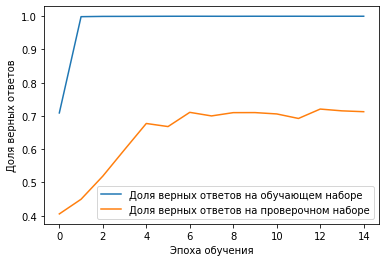

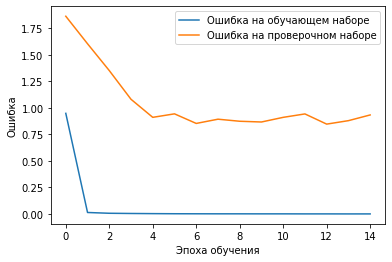

In [84]:
# Обучим сеть на обучающей выборке xTrain
history = modelEmb.fit(xTrain, yTrain, epochs=15, batch_size=150, validation_data=(xTest, yTest))

# Посмотрим на график обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


# График ошибок. На предмет переобучения сети.
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

Посмотрим какие будут показатели у той же нейронной сети, только выходной слой с активацией **sigmoid**

In [85]:
#  activation='sigmoid'
modelEmb = Sequential()

modelEmb.add(Embedding(maxWordsCount, 20, input_length=xLen))       # maxWordsCount = 20000
modelEmb.add(SpatialDropout1D(0.2))

modelEmb.add(Flatten())
modelEmb.add(BatchNormalization())

modelEmb.add(Dense(500, activation="relu"))
modelEmb.add(Dropout(0.4))
modelEmb.add(BatchNormalization())

modelEmb.add(Dense(6,activation='sigmoid'))

# Скомпилируем данную сеть
modelEmb.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
118/118 [==============================] - 4s 30ms/step - loss: 1.5942 - accuracy: 0.5153 - val_loss: 1.5889 - val_accuracy: 0.3690
Epoch 2/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0139 - accuracy: 0.9985 - val_loss: 1.4424 - val_accuracy: 0.3404
Epoch 3/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0068 - accuracy: 0.9995 - val_loss: 1.2166 - val_accuracy: 0.5028
Epoch 4/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.9989 - val_accuracy: 0.6274
Epoch 5/15
118/118 [==============================] - 3s 25ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.9168 - val_accuracy: 0.6754
Epoch 6/15
118/118 [==============================] - 3s 25ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.9655 - val_accuracy: 0.6696
Epoch 7/15
118/118 [==============================] - 3s 26ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.9418 - val_accuracy: 0.6865

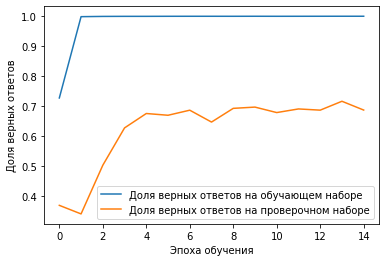

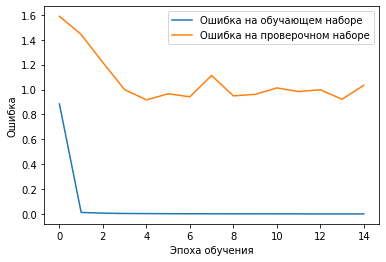

In [86]:
# Обучим сеть на обучающей выборке xTrain
history = modelEmb.fit(xTrain, yTrain, epochs=15, batch_size=150, validation_data=(xTest, yTest))

# Посмотрим на график обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


# График ошибок. На предмет переобучения сети.
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 


# Проверим результаты Embedding сети

In [88]:
# Преобразуем тестовую выборку
_, xtest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [89]:
pred = recognizerMultiClass (modelEmb, xtest6Classes, "Embedding")

Название нейронной сети:  Embedding

Класс: О. Генри   75% сеть предсказала: О. Генри       УРА, ответ ВЕРНЫЙ!
Класс: Стругацкие 51% сеть предсказала: Стругацкие     УРА, ответ ВЕРНЫЙ!
Класс: Булгаков   58% сеть предсказала: Булгаков       УРА, ответ ВЕРНЫЙ!
Класс: Саймак     57% сеть предсказала: Саймак         УРА, ответ ВЕРНЫЙ!
Класс: Фрай       88% сеть предсказала: Фрай           УРА, ответ ВЕРНЫЙ!
Класс: Брэдберри  64% сеть предсказала: Брэдберри      УРА, ответ ВЕРНЫЙ!

Средний процент распознавания  68 %



Сеть с Embedding тексты обработала верно. На данный момент средний процент распознавания меньше чем у Bag of Words. 